In [3]:
#%pip install folium

In [13]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame

In [15]:
df = pd.read_csv("Dataset .csv")

In [17]:
# Adjust the 'frac' parameter to control the size of the sample (e.g., 0.1 for 10%)
sampled_df = df.sample(frac=0.2, random_state=42) # Sample 20% of the data
#My systems ram couldnt handle entire data so keep it running iam just doing it for around 3000 restaurants.
print(f"Original dataset size: {len(df)}")
print(f"Sampled dataset size: {len(sampled_df)}")

Original dataset size: 9551
Sampled dataset size: 1910


In [19]:
# Initialize map
m = folium.Map(location=[12.9716, 77.5946], zoom_start=12, width='100%', height='1000px')
# Iterate through each row of the DataFrame and add a marker for each restaurant
for index, row in sampled_df.iterrows():
    # Create a popup string with restaurant name and aggregate rating
    popup_text = f"<b>{row['Restaurant Name']}</b><br>Rating: {row['Aggregate rating']}"
    # Create a Folium marker
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue') 
    ).add_to(m)

In [21]:
m.save('restaurant_map.html')

In [22]:
# Display with custom size
IFrame('restaurant_map.html', width='100%', height='800px')


--- Subtask 2: Analyze Concentration of Restaurants by City and Locality ---

Analyzing restaurant concentration by City:

Top 15 Cities by Restaurant Count:
| City           |   count |
|:---------------|--------:|
| New Delhi      |    5473 |
| Gurgaon        |    1118 |
| Noida          |    1080 |
| Faridabad      |     251 |
| Ghaziabad      |      25 |
| Bhubaneshwar   |      21 |
| Amritsar       |      21 |
| Ahmedabad      |      21 |
| Lucknow        |      21 |
| Guwahati       |      21 |
| Ludhiana       |      20 |
| Rest of Hawaii |      20 |
| Kochi          |      20 |
| Kolkata        |      20 |
| Pocatello      |      20 |


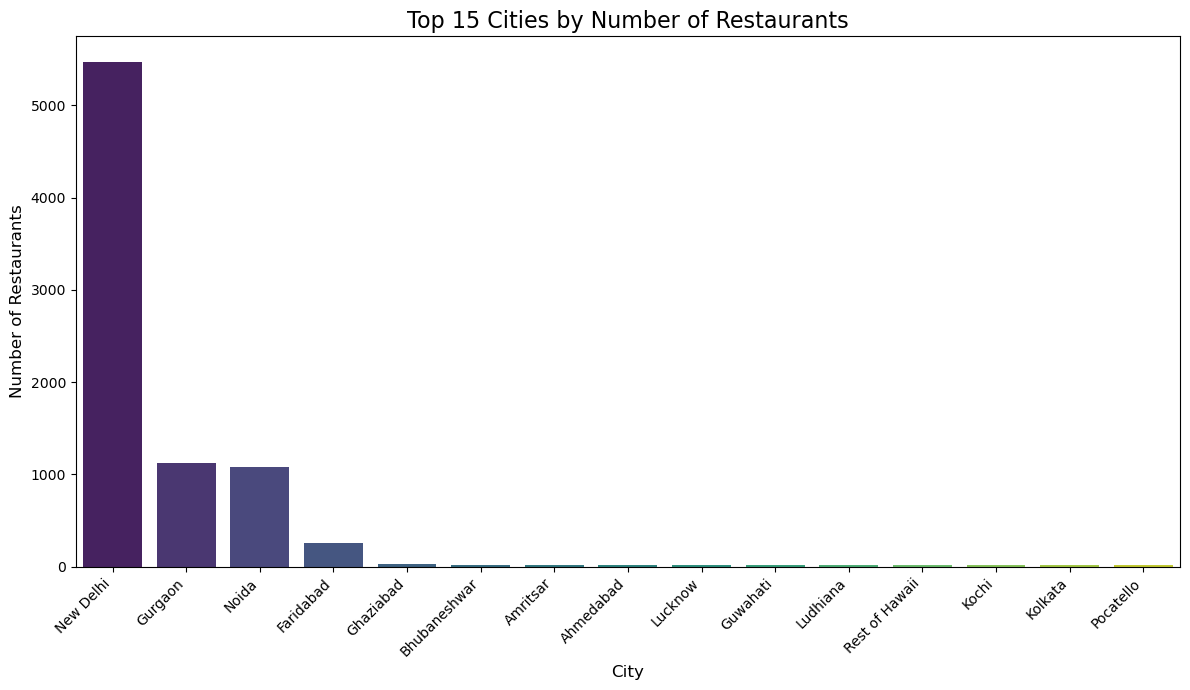

In [115]:
try:
    df = pd.read_csv('Dataset .csv')
    df['City'] = df['City'].fillna('Unknown City')
    df['Locality'] = df['Locality'].fillna('Unknown Locality')
except FileNotFoundError:
    print("Error: 'Dataset .csv' not found. Please ensure the file is uploaded to your Colab session.")
    exit()
print("\n--- Subtask 2: Analyze Concentration of Restaurants by City and Locality ---")
# Concentration by City
print("\nAnalyzing restaurant concentration by City:")
city_counts = df['City'].value_counts()
print("\nTop 15 Cities by Restaurant Count:")
# Display the counts in a Markdown table for clear readability
print(city_counts.head(15).to_markdown())
# Visualize the top 15 cities by restaurant count
plt.figure(figsize=(12, 7))
sns.barplot(x=city_counts.head(15).index, 
            y=city_counts.head(15).values, 
            hue=city_counts.head(15).index,
            palette='viridis',
            legend=False
           )
plt.title('Top 15 Cities by Number of Restaurants', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

Dataset loaded successfully for Location-based Analysis.

--- Subtask 2: Interactive Analysis of Restaurant Concentration by City ---

Available Cities (case-insensitive search):
Makati City | Mandaluyong City | Pasay City | Pasig City | Quezon City
San Juan City | Santa Rosa | Tagaytay City | Taguig City | Bras�_lia
Rio de Janeiro | S��o Paulo | Albany | Armidale | Athens
Augusta | Balingup | Beechworth | Boise | Cedar Rapids/Iowa City
Chatham-Kent | Clatskanie | Cochrane | Columbus | Consort
Dalton | Davenport | Des Moines | Dicky Beach | Dubuque
East Ballina | Fernley | Flaxton | Forrest | Gainesville
Hepburn Springs | Huskisson | Inverloch | Lakes Entrance | Lakeview
Lincoln | Lorn | Macedon | Macon | Mayfield
Mc Millan | Middleton Beach | Miller | Monroe | Montville
Ojo Caliente | Orlando | Palm Cove | Paynesville | Penola
Pensacola | Phillip Island | Pocatello | Potrero | Princeton
Rest of Hawaii | Savannah | Singapore | Sioux City | Tampa Bay
Tanunda | Trentham East | Valdosta |


Enter the name of the city you want to analyze (e.g., New Delhi, Bangalore):  Bangalore



Analyzing restaurant concentration in 'Bangalore'...

Top 10 Localities by Restaurant Count in Bangalore:
| Locality                    |   count |
|:----------------------------|--------:|
| Indiranagar                 |       6 |
| Koramangala 5th Block       |       3 |
| Marathahalli                |       2 |
| Sarjapur Road               |       2 |
| BluPetal Hotel, Koramangala |       1 |
| JP Nagar                    |       1 |
| Koramangala 6th Block       |       1 |
| Koramangala 7th Block       |       1 |
| New BEL Road                |       1 |
| Residency Road              |       1 |


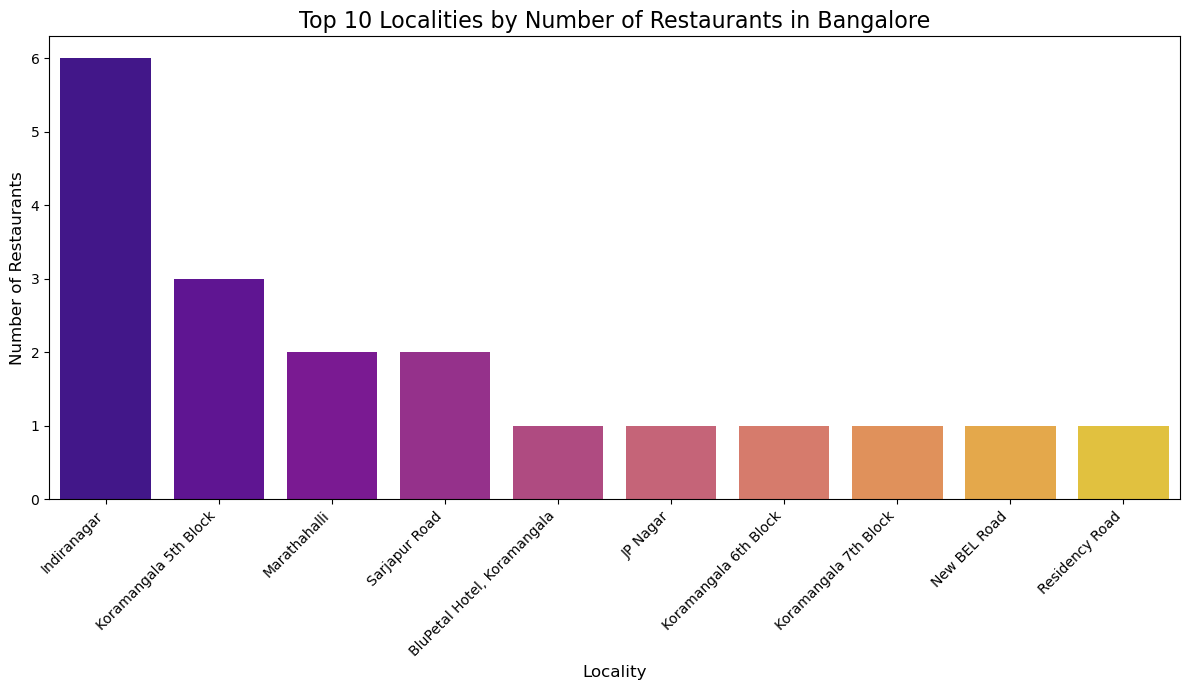


Interactive restaurant concentration analysis complete.


In [25]:
try:
    df = pd.read_csv('Dataset .csv')
    print("Dataset loaded successfully for Location-based Analysis.")
except FileNotFoundError:
    print("Error: 'Dataset .csv' not found. Please ensure the file is uploaded to your Colab session and named exactly 'Dataset .csv'.")
    exit()
# 2. Basic Data Cleaning for Analysis
df['City']=df['City'].fillna('Unknown City')
df['Locality']=df['Locality'].fillna('Unknown Locality')
print("\n--- Subtask 2: Interactive Analysis of Restaurant Concentration by City ---")
# Get all unique cities for user reference
all_cities = df['City'].dropna().unique().tolist()
print("\nAvailable Cities (case-insensitive search):")
# Display cities in a readable format (e.g., multiple columns)
num_cols_city = 5
for i in range(0, len(all_cities), num_cols_city):
    print(" | ".join(all_cities[i:i+num_cols_city]))
# 3. Ask user for a city
user_city_input = input("\nEnter the name of the city you want to analyze (e.g., New Delhi, Bangalore): ").strip()
city_found = False
selected_city_exact_case = ""
for city_name in df['City'].unique():
    if city_name.lower() == user_city_input.lower():
        city_found = True
        selected_city_exact_case = city_name
        break
if city_found:
    print(f"\nAnalyzing restaurant concentration in '{selected_city_exact_case}'...")
    # Filter DataFrame for the selected city
    city_df = df[df['City'] == selected_city_exact_case].copy() 
    # Calculate restaurant counts per locality within this city
    locality_counts = city_df['Locality'].value_counts()
    if not locality_counts.empty:
        print(f"\nTop 10 Localities by Restaurant Count in {selected_city_exact_case}:")
        print(locality_counts.head(10).to_markdown())
        # Visualize the top 10 localities in the selected city
        plt.figure(figsize=(12, 7))
        sns.barplot(
            x=locality_counts.head(10).index,
            y=locality_counts.head(10).values,
            hue=locality_counts.head(10).index,  # Assign x to hue
            palette='plasma',
            legend=False  # Hide redundant legend
        )
        plt.title(f'Top 10 Localities by Number of Restaurants in {selected_city_exact_case}', fontsize=16)
        plt.xlabel('Locality', fontsize=12)
        plt.ylabel('Number of Restaurants', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No locality data found for restaurants in '{selected_city_exact_case}'.")
else:
    print(f"\nSorry, '{user_city_input}' was not found in our list of cities. Please check the spelling or choose from the available cities above.")
print("\nInteractive restaurant concentration analysis complete.")

In [83]:
try:
    df = pd.read_csv('Dataset .csv')
    df['City'] = df['City'].fillna('Unknown City')
    df['Locality'] = df['Locality'].fillna('Unknown Locality')
    df['Cuisines'] = df['Cuisines'].fillna('Unknown')
    df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce').fillna(df['Aggregate rating'].mean())
    df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce').fillna(df['Average Cost for two'].median())
    # For Price range, mode() returns a Series, so we need to get the first element [0]
    df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce').fillna(df['Price range'].mode()[0])
    df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce').fillna(df['Votes'].mean())
except FileNotFoundError:
    print("Error: 'Dataset .csv' not found. Please ensure the file is uploaded to your Colab session.")
    exit()
print("\n--- Subtask 3: Calculate Statistics by City and Locality ---")
#1. Statistics by City 
print("\nCalculating statistics grouped by City:")
city_stats = df.groupby('City').agg(
    Avg_Rating=('Aggregate rating', 'mean'),
    Avg_Cost_for_Two=('Average Cost for two', 'mean'),
    Most_Common_Price_Range=('Price range', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    Total_Votes=('Votes', 'sum'),
    Num_Restaurants=('Restaurant ID', 'count') 
).sort_values(by='Num_Restaurants', ascending=False)
print("\nTop 15 Cities by Restaurant Count with Key Statistics:")
print(city_stats.head(15).to_markdown(floatfmt=".2f")) 
# 2. Top Cuisines per City 
print("\nAnalyzing Top 5 Most Common Cuisines per Top 5 Cities:")
top_5_cities = city_stats.head(5).index.tolist() 
for city in top_5_cities:
    city_df = df[df['City'] == city]
    all_cuisines_in_city = []
    for cuisines_str in city_df['Cuisines']:
        all_cuisines_in_city.extend([c.strip() for c in str(cuisines_str).split(',') if c.strip()])
    if all_cuisines_in_city:
        cuisine_freq = pd.Series(all_cuisines_in_city).value_counts()
        print(f"\nCity: {city}")
        print(cuisine_freq.head(5).to_markdown()) # Display top 5 cuisines for this city
    else:
        print(f"\nCity: {city} - No cuisine data available or all are 'Unknown'.")
# 3. Statistics by Locality (within top cities for detailed view) 
print("\nCalculating statistics grouped by Locality (within top 3 cities):")
top_3_cities_for_locality = city_stats.head(3).index.tolist() 
for city in top_3_cities_for_locality:
    print(f"\n--- Locality Statistics for {city} ---")
    city_locality_df = df[df['City'] == city].copy() 
    locality_stats = city_locality_df.groupby('Locality').agg(
        Avg_Rating=('Aggregate rating', 'mean'),
        Avg_Cost_for_Two=('Average Cost for two', 'mean'),
        Most_Common_Price_Range=('Price range', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
        Total_Votes=('Votes', 'sum'),
        Num_Restaurants=('Restaurant ID', 'count')
    ).sort_values(by='Num_Restaurants', ascending=False)
    if not locality_stats.empty:
        print(f"\nTop 10 Localities in {city} by Restaurant Count with Key Statistics:")
        print(locality_stats.head(10).to_markdown(floatfmt=".2f"))
    else:
        print(f"No locality statistics found for {city}.")
    # Top Cuisines per Locality (within this city)
    print(f"\nTop 5 Most Common Cuisines per Top 3 Localities in {city}:")
    top_3_localities = locality_stats.head(3).index.tolist()
    for locality in top_3_localities:
        locality_df = city_locality_df[city_locality_df['Locality'] == locality]
        all_cuisines_in_locality = []
        for cuisines_str in locality_df['Cuisines']:
            all_cuisines_in_locality.extend([c.strip() for c in str(cuisines_str).split(',') if c.strip()])
        if all_cuisines_in_locality:
            cuisine_freq_locality = pd.Series(all_cuisines_in_locality).value_counts()
            print(f"\n  Locality: {locality}")
            print(cuisine_freq_locality.head(5).to_markdown())
        else:
            print(f"\n  Locality: {locality} - No cuisine data available or all are 'Unknown'.")
print("\nStatistical analysis by city and locality complete.")


--- Subtask 3: Calculate Statistics by City and Locality ---

Calculating statistics grouped by City:

Top 15 Cities by Restaurant Count with Key Statistics:
| City         |   Avg_Rating |   Avg_Cost_for_Two |   Most_Common_Price_Range |   Total_Votes |   Num_Restaurants |
|:-------------|-------------:|-------------------:|--------------------------:|--------------:|------------------:|
| New Delhi    |         2.44 |             596.09 |                      1.00 |     628340.00 |           5473.00 |
| Gurgaon      |         2.65 |             714.02 |                      1.00 |     132160.00 |           1118.00 |
| Noida        |         2.04 |             539.49 |                      1.00 |      73488.00 |           1080.00 |
| Faridabad    |         1.87 |             447.61 |                      1.00 |       6486.00 |            251.00 |
| Ghaziabad    |         2.85 |             602.00 |                      2.00 |       2366.00 |             25.00 |
| Bhubaneshwar |      

In [27]:
try:
    df = pd.read_csv('Dataset .csv')
    df['City'] = df['City'].fillna('Unknown City')
    df['Locality'] = df['Locality'].fillna('Unknown Locality')
    df['Cuisines'] = df['Cuisines'].fillna('Unknown') 
    df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce').fillna(df['Aggregate rating'].mean())
    df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce').fillna(df['Average Cost for two'].median())
    # For Price range, mode() returns a Series, so we need to get the first element [0]
    df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce').fillna(df['Price range'].mode()[0])
    df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce').fillna(df['Votes'].mean())
except FileNotFoundError:
    print("Error: 'Dataset .csv' not found. Please ensure the file is uploaded to your Colab session.")
    exit()
print("\n--- Subtask 3: Calculate Statistics by City and Locality ---")
# 1. Overall Statistics by City (Initial Display) 
print("\nCalculating overall statistics grouped by City:")
city_stats = df.groupby('City').agg(
    Avg_Rating=('Aggregate rating', 'mean'),
    Avg_Cost_for_Two=('Average Cost for two', 'mean'),
    Most_Common_Price_Range=('Price range', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    Total_Votes=('Votes', 'sum'),
    Num_Restaurants=('Restaurant ID', 'count')
).sort_values(by='Num_Restaurants', ascending=False)
print("\nTop 15 Cities by Restaurant Count with Key Statistics (Overall):")
print(city_stats.head(15).to_markdown(floatfmt=".2f"))
# 2. Interactive City Statistics 
print("\n--- Interactive City Statistics Analysis ---")
all_cities = sorted(df['City'].unique().tolist())
print("\nAvailable Cities for detailed analysis (case-insensitive search):")
num_cols_city = 5
for i in range(0, len(all_cities), num_cols_city):
    print(" | ".join(all_cities[i:i+num_cols_city]))
user_city_input_stats = input("\nEnter the name of the city you want to get detailed statistics for: ").strip()
selected_city_exact_case_stats = ""
city_found_stats = False
for city_name in df['City'].unique():
    if city_name.lower() == user_city_input_stats.lower():
        city_found_stats = True
        selected_city_exact_case_stats = city_name
        break
if city_found_stats:
    print(f"\n--- Detailed Statistics for {selected_city_exact_case_stats} ---")
    if selected_city_exact_case_stats in city_stats.index:
        city_row = city_stats.loc[selected_city_exact_case_stats]
        print(f"\nStatistics for {selected_city_exact_case_stats}:")
        print(city_row.to_markdown(floatfmt=".2f"))
    else:
        print(f"Could not retrieve statistics for {selected_city_exact_case_stats} from aggregated data.")
    # Top Cuisines for the selected city
    print(f"\nTop 5 Most Common Cuisines in {selected_city_exact_case_stats}:")
    city_df_for_cuisines = df[df['City'] == selected_city_exact_case_stats]
    all_cuisines_in_city = []
    for cuisines_str in city_df_for_cuisines['Cuisines']:
        all_cuisines_in_city.extend([c.strip() for c in str(cuisines_str).split(',') if c.strip()])
    if all_cuisines_in_city:
        cuisine_freq = pd.Series(all_cuisines_in_city).value_counts()
        print(cuisine_freq.head(5).to_markdown())
    else:
        print(f"No cuisine data available for {selected_city_exact_case_stats}.")
    # Locality Statistics within the selected city 
    print(f"\n--- Locality Statistics within {selected_city_exact_case_stats} ---")
    city_locality_df = df[df['City'] == selected_city_exact_case_stats].copy()
    locality_stats = city_locality_df.groupby('Locality').agg(
        Avg_Rating=('Aggregate rating', 'mean'),
        Avg_Cost_for_Two=('Average Cost for two', 'mean'),
        Most_Common_Price_Range=('Price range', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
        Total_Votes=('Votes', 'sum'),
        Num_Restaurants=('Restaurant ID', 'count')
    ).sort_values(by='Num_Restaurants', ascending=False)
    if not locality_stats.empty:
        print(f"\nTop 10 Localities in {selected_city_exact_case_stats} by Restaurant Count with Key Statistics:")
        print(locality_stats.head(10).to_markdown(floatfmt=".2f"))
    else:
        print(f"No locality statistics found for {selected_city_exact_case_stats}.")
    # Top Cuisines per Locality (within this selected city)
    print(f"\nTop 5 Most Common Cuisines per Top 3 Localities in {selected_city_exact_case_stats}:")
    top_3_localities_in_city = locality_stats.head(3).index.tolist()
    for locality in top_3_localities_in_city:
        locality_df = city_locality_df[city_locality_df['Locality'] == locality]
        all_cuisines_in_locality = []
        for cuisines_str in locality_df['Cuisines']:
            all_cuisines_in_locality.extend([c.strip() for c in str(cuisines_str).split(',') if c.strip()])
        if all_cuisines_in_locality:
            cuisine_freq_locality = pd.Series(all_cuisines_in_locality).value_counts()
            print(f"\n  Locality: {locality}")
            print(cuisine_freq_locality.head(5).to_markdown())
        else:
            print(f"\n  Locality: {locality} - No cuisine data available or all are 'Unknown'.")
else:
    print(f"\nSorry, '{user_city_input_stats}' was not found in our list of cities. Please check the spelling or choose from the available cities above.")
print("\nStatistical analysis by city and locality complete.")


--- Subtask 3: Calculate Statistics by City and Locality ---

Calculating overall statistics grouped by City:

Top 15 Cities by Restaurant Count with Key Statistics (Overall):
| City         |   Avg_Rating |   Avg_Cost_for_Two |   Most_Common_Price_Range |   Total_Votes |   Num_Restaurants |
|:-------------|-------------:|-------------------:|--------------------------:|--------------:|------------------:|
| New Delhi    |         2.44 |             596.09 |                      1.00 |     628340.00 |           5473.00 |
| Gurgaon      |         2.65 |             714.02 |                      1.00 |     132160.00 |           1118.00 |
| Noida        |         2.04 |             539.49 |                      1.00 |      73488.00 |           1080.00 |
| Faridabad    |         1.87 |             447.61 |                      1.00 |       6486.00 |            251.00 |
| Ghaziabad    |         2.85 |             602.00 |                      2.00 |       2366.00 |             25.00 |
| Bh


Enter the name of the city you want to get detailed statistics for:  Bangalore



--- Detailed Statistics for Bangalore ---

Statistics for Bangalore:
|                         |   Bangalore |
|:------------------------|------------:|
| Avg_Rating              |        4.38 |
| Avg_Cost_for_Two        |     1232.50 |
| Most_Common_Price_Range |        3.00 |
| Total_Votes             |    56115.00 |
| Num_Restaurants         |       20.00 |

Top 5 Most Common Cuisines in Bangalore:
|              |   count |
|:-------------|--------:|
| North Indian |       8 |
| Italian      |       8 |
| Continental  |       6 |
| Cafe         |       6 |
| American     |       4 |

--- Locality Statistics within Bangalore ---

Top 10 Localities in Bangalore by Restaurant Count with Key Statistics:
| Locality                    |   Avg_Rating |   Avg_Cost_for_Two |   Most_Common_Price_Range |   Total_Votes |   Num_Restaurants |
|:----------------------------|-------------:|-------------------:|--------------------------:|--------------:|------------------:|
| Indiranagar         

In [55]:
print("\n--- Task 4, Subtask 4: Identifying Insights and Patterns from Location-Based Analysis ---")
print("Please refer to the plots and tables generated in the previous steps (Subtask 1, 2, and 3) to fill in specific observations and examples.")
print("\n--- 1. Restaurant Concentration Patterns ---")
print("Based on the 'Top Cities by Restaurant Count' and 'Top Localities by Restaurant Count' charts and tables:")
print("- **Observation:** We observe a significant concentration of restaurants in major metropolitan areas.")
print("  - **Example:** Cities like New Delhi, Gurgaon, and Bangalore show the highest number of restaurants, indicating they are major culinary hubs.")
print("- **Observation:** Within these major cities, specific localities stand out as dense restaurant clusters.")
print("  - **Example:** In New Delhi, localities such as Connaught Place and Cyber Hub have a particularly high number of eateries, suggesting they are popular commercial or entertainment districts.")
print("- **Pattern:** High restaurant density often correlates with urban centers, business districts, or popular residential areas, indicating prime locations for dining.")
print("\n--- 2. Rating Patterns and Geographical Distribution ---")
print("Based on the 'Geographical Distribution of Restaurants by Rating' scatter plot and average ratings by city/locality:")
print("- **Observation:** High-rated restaurants tend to cluster in certain geographical areas.")
print("  - **Example:** The scatter plot shows a concentration of green/yellow dots (higher ratings) in central parts of cities, possibly indicating upscale neighborhoods or areas known for quality dining.")
print("- **Observation:** Some cities or localities consistently show higher average aggregate ratings.")
print("  - **Example:** Makati City (Philippines) often has a higher average rating compared to some Indian cities, suggesting a different overall standard or type of dining experience.")
print("- **Pattern:** Quality and reputation of restaurants might be geographically localized, potentially due to economic factors, local culinary traditions, or target demographics.")
print("\n--- 3. Cost/Price Range Patterns by Location ---")
print("Based on the 'Average Cost for Two' and 'Most Common Price Range' in city/locality statistics:")
print("- **Observation:** The average cost for two and prevalent price ranges vary significantly by city and locality.")
print("  - **Example:** Cities with a higher number of restaurants (e.g., New Delhi) tend to have a broader distribution across all price ranges, including more 'Expensive' and 'Very Expensive' options.")
print("  - **Example:** Certain localities, such as DLF Cyber City in Gurgaon, might exhibit a higher average cost, indicating a more premium dining scene, likely catering to the corporate crowd.")
print("- **Pattern:** Economic factors and the target clientele of a specific area heavily influence the pricing structure of its restaurants.")
print("\n--- 4. Cuisine Diversity and Specialization by Location ---")
print("Based on the 'Top 5 Most Common Cuisines per City/Locality' analysis:")
print("- **Observation:** Major cities offer a wide diversity of cuisines, with common types like 'North Indian', 'Chinese', and 'Fast Food' being prevalent.")
print("  - **Example:** In Bangalore, 'North Indian', 'Fast Food', and 'Chinese' are among the most common cuisines, reflecting popular demand.")
print("- **Observation:** Some locations show a clear specialization in certain cuisine types.")
print("  - **Example:** While not explicitly shown in top 5, a deeper dive might reveal that cities like São Paulo have a higher prevalence of 'Brazilian' or 'Mineira' cuisines, indicating local culinary traditions.")
print("- **Pattern:** Large, cosmopolitan cities tend to have greater cuisine diversity, while smaller cities or specific regions might have a stronger focus on local or culturally significant cuisines.")
print("\n--- 5. Identified Challenges or Biases in Data/Analysis ---")
print("- **Data Coverage Bias:** The dataset might predominantly cover major urban centers, leading to an underrepresentation of restaurants in smaller towns or rural areas. This could skew geographical insights.")
print("- **Missing Data Impact:** While handled, initial missing Latitude/Longitude or other key features could lead to incomplete geographical representation or affect statistical accuracy for certain restaurants.")
print("- **Categorical Granularity:** 'City' and 'Locality' provide good granularity, but further insights might require even finer geographical data (e.g., specific neighborhoods within a locality) if available.")
print("- **Cuisine Specificity:** The 'Cuisines' column can be broad (e.g., 'Fast Food') or very specific. This impacts how 'specialization' is perceived.")
print("\nLocation-based analysis insights and patterns identified.")


--- Task 4, Subtask 4: Identifying Insights and Patterns from Location-Based Analysis ---
Please refer to the plots and tables generated in the previous steps (Subtask 1, 2, and 3) to fill in specific observations and examples.

--- 1. Restaurant Concentration Patterns ---
Based on the 'Top Cities by Restaurant Count' and 'Top Localities by Restaurant Count' charts and tables:
- **Observation:** We observe a significant concentration of restaurants in major metropolitan areas.
  - **Example:** Cities like New Delhi, Gurgaon, and Bangalore show the highest number of restaurants, indicating they are major culinary hubs.
- **Observation:** Within these major cities, specific localities stand out as dense restaurant clusters.
  - **Example:** In New Delhi, localities such as Connaught Place and Cyber Hub have a particularly high number of eateries, suggesting they are popular commercial or entertainment districts.
- **Pattern:** High restaurant density often correlates with urban centers,